In [1]:
import numpy as np
import math
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from datetime import datetime
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("./train.csv", index_col=0)
test = pd.read_csv("./test.csv", index_col=0).reset_index(drop=True)
submission = pd.read_csv("./sample_submission.csv")

In [3]:
train = train.dropna()
train = train.drop(train[train['dered_g']==-9999].index)
train = train.drop(train[train['dered_i']==-9999].index)
train = train.drop(train[train['dered_z']==-9999].index)

In [4]:
train['u-g'] = train['u'] - train['g']
train['g-r'] = train['g'] - train['r']
train['r-i'] = train['r'] - train['i']
train['i-z'] = train['i'] - train['z']
train['dered_u-g'] = train['dered_u'] - train['dered_g']
train['dered_g-r'] = train['dered_g'] - train['dered_r']
train['dered_r-i'] = train['dered_r'] - train['dered_i']
train['dered_i-z'] = train['dered_i'] - train['dered_z']

test['u-g'] = test['u'] - test['g']
test['g-r'] = test['g'] - test['r']
test['r-i'] = test['r'] - test['i']
test['i-z'] = test['i'] - test['z']
test['dered_u-g'] = test['dered_u'] - test['dered_g']
test['dered_g-r'] = test['dered_g'] - test['dered_r']
test['dered_r-i'] = test['dered_r'] - test['dered_i']
test['dered_i-z'] = test['dered_i'] - test['dered_z']

In [5]:
# ugriz = train[['u', 'g', 'r', 'i', 'z']]
# dered_ugriz = train[['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z']]
airmass = train[['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']]

# train['ugriz'] = ugriz.median(axis = 1)
# train['dered_ugriz'] = dered_ugriz.median(axis = 1)
train["airmass"] = airmass.median(axis = 1)

In [6]:
# n값 처리
train['nO-nD'] = train['nObserve'] - train['nDetect']
test['nO-nD'] = test['nObserve'] - test['nDetect']

In [7]:
# train = train.drop(['u', 'g', 'r', 'i', 'z'], axis=1)
# train = train.drop(['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], axis=1)
train = train.drop(['nObserve', 'nDetect'], axis=1)
train = train.drop(['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], axis=1)

# test = test.drop(['u', 'g', 'r', 'i', 'z'], axis=1)
# test = test.drop(['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], axis=1)
test = test.drop(['nObserve', 'nDetect'], axis=1)
test = test.drop(['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], axis=1)

In [8]:
# split data into X and y
Y = train['class']
del train['class']
X = train

In [9]:
# split data into train and test sets
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
eval_set = [(X_test, y_test)]

In [10]:
start_time = datetime.now()

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    booster='gbtree',
    max_depth=12,
    learning_rate=0.1,
    n_estimators=500,
    scale_pos_weight=1.2,
    eval_set=eval_set,
    early_stopping_rounds=20
)

model.fit(X_train, y_train)

end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time)


elapsed time =  12:35:37.059472


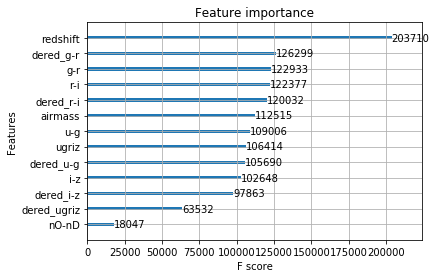

In [11]:
plot_importance(model)

In [12]:
model_pred = model.predict(X_test)
accuracy_score(y_test, model_pred)

0.9339116738959237

In [13]:
# FI = pd.DataFrame(data=model.feature_importances_.reshape(1, 57), columns=train[train_columns].columns)
# FI.to_csv("feature.csv",index=False, encoding='utf-8-sig')

In [14]:
# pred = model.predict(test[test_columns])
# submission['class'] = pred
# submission.to_csv("submission_xgb.csv",index=False, encoding='utf-8-sig')